## Search Engine Tools and Agents

### Arxiv Search Tool
The Arxiv Search Tool allows you to search for academic papers on the Arxiv platform. You can specify your search query, and the tool will return relevant papers based on your input. 

In [2]:
##  Tool creation
from langchain_community.tools import WikipediaQueryRun, ArxivQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [3]:
## Used inbuild tool of wikipedia

api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=250)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)

wiki.name

'wikipedia'

In [4]:
## used inbuild tool of arxiv

api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=250)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
arxiv.name

'arxiv'

### Custom Tool [RAG Tool] 
The RAG Tool is a custom tool designed for Retrieval-Augmented Generation (RAG) tasks. It allows you to retrieve relevant information from a knowledge base and use it to generate responses. You can specify your query, and the tool will fetch relevant data to assist in generating accurate and informative responses.

In [5]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings

c:\Coding\AI_ML_DL\genAI-with-langchain\chatbot\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [6]:
## for load enviornment variable
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN')

In [7]:
loader = WebBaseLoader('https://docs.langchain.com/langsmith/home')
docs = loader.load()
documents = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=500).split_documents(docs)
vectordb = FAISS.from_documents(documents, HuggingFaceEmbeddings())
retriver = vectordb.as_retriever()
retriver

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000018EF26D2920>, search_kwargs={})

In [8]:
from langchain_core.tools import tool

@tool
def langsmith_search(query: str):
    """Retrieve relevant documents from the vector store."""
    return retriever.invoke(query)

langsmith_search.name

'langsmith_search'

In [9]:
langsmith_search.description

'Retrieve relevant documents from the vector store.'

In [11]:
tools = [arxiv, wiki, langsmith_search]
tools

[ArxivQueryRun(api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=1, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=250)),
 WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'c:\\Coding\\AI_ML_DL\\genAI-with-langchain\\chatbot\\venv\\lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=1, lang='en', load_all_available_meta=False, doc_content_chars_max=250)),
 StructuredTool(name='langsmith_search', description='Retrieve relevant documents from the vector store.', args_schema=<class 'langchain_core.utils.pydantic.langsmith_search'>, func=<function langsmith_search at 0x0000018EF26FC9D0>)]

#### Run all the tools with Agent and LLM Tools
To run all the tools with an Agent and LLM (Language Model) Tools, you can follow these steps:

In [37]:
from langchain_groq import ChatGroq

groq_api = os.getenv('GROQ_API_KEY')

llm = ChatGroq(model='llama-3.1-8b-instant', temperature=0)

In [38]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI assistant."),
    ("human", "{input}"),
    MessagesPlaceholder(variable_name="agent_scratchpad"),
])

prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful AI assistant.'), additional_kwargs={}),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

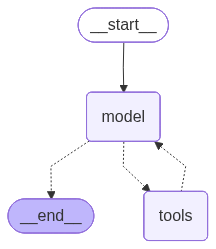

In [42]:
from langchain.agents import create_agent

agent = create_agent(
    model=llm,
    tools=tools,
    # system_prompt=prompt.messages
)

agent


In [44]:
from langchain.agents import AgentExecutor


ImportError: cannot import name 'AgentExecutor' from 'langchain.agents' (c:\Coding\AI_ML_DL\genAI-with-langchain\chatbot\venv\lib\site-packages\langchain\agents\__init__.py)